<a href="https://colab.research.google.com/github/dsgaldino/Metodos_Analiticos_Redes_Sociais/blob/main/karatekas_zachary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa Final

## Métodos Analíticos para Redes Sociais

***Aluno:*** Diego Soares Galdino

***Prof.:*** Marcelo de Oliveira Rosa


### Bibiliotecas

In [1]:
install.packages("igraph")
library(igraph)

install.packages("ggplot2")
library(ggplot2)

install.packages("readr")
library(readr)

install.packages("dplyr")
library(dplyr)

install.packages("ggmap")
library(ggmap)

install.packages("rgl")
library(rgl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘Rcpp’, ‘RgoogleMaps’, ‘png’, ‘plyr’, ‘jpeg’, ‘bitops’


The legacy package

### Rede complexa do clube de karatekas Zachary

In [2]:
# Leitura da Rede
zachary <- read.graph('zachary.txt', 'ncol', directed = FALSE)

In [3]:
# Cópias da rede e dos nós
arch_copy <- zachary

## Respostas

### 1. Qual a representação adotada?

    a. Que dados foram considerados como nós, arestas, pesos, e por quê?

In [4]:
# Obteção pares de nós conectados por arestas
edge_pairs <- ends(arch_copy, E(arch_copy))

# Cálculo do grau para cada nó
grau <- degree(arch_copy)

# Cálculo do coeficiente de clusterização para cada nó
coeficiente_clusterizacao <- transitivity(arch_copy, type = "weighted")

# Verificação os nomes dos nós únicos
unique_node_names <- V(arch_copy)

# Verificação as arestas únicas (nomes)
unique_edge_names <- E(arch_copy)$name

# Verificação os pesos das arestas únicas
unique_edge_weights <-E(arch_copy)$weight

In [5]:
# Impressão os resultados
cat("Nomes dos nós únicos:\n")
print(unique_node_names)

cat("\nPares de nós conectados por arestas:\n")
print(head(edge_pairs))

cat("\nGrau de cada nó:\n")
print(head(grau))

cat("\nCoeficiente de clusterização para cada nó:\n")
print(head(coeficiente_clusterizacao))

cat("\nArestas únicas (nomes):\n")
print(unique_edge_names)

cat("\nPesos das arestas únicas:\n")
print(unique_edge_weights)

Nomes dos nós únicos:
+ 34/34 vertices, named, from e577298:
 [1] 1  2  3  4  5  6  7  8  9  11 12 13 14 18 20 22 32 31 10 28 29 33 17 34 15
[26] 16 19 21 23 24 26 30 25 27

Pares de nós conectados por arestas:
     [,1] [,2]
[1,] "1"  "2" 
[2,] "1"  "3" 
[3,] "1"  "4" 
[4,] "1"  "5" 
[5,] "1"  "6" 
[6,] "1"  "7" 

Grau de cada nó:
 1  2  3  4  5  6 
16  9 10  6  3  4 

Coeficiente de clusterização para cada nó:
[1] 0.1809524 0.4137931 0.3164983 0.6666667 0.6875000 0.5238095

Arestas únicas (nomes):
NULL

Pesos das arestas únicas:
 [1] 4 5 3 3 3 3 2 2 2 3 1 3 2 2 2 2 6 3 4 5 1 2 2 2 3 4 5 1 3 2 2 2 3 3 3 2 3 5
[39] 3 3 3 3 3 4 2 3 3 2 3 4 1 2 1 3 1 2 3 5 4 3 5 4 2 3 2 7 4 2 4 2 2 4 2 3 3 4
[77] 4 5


### 2 - Qual a melhor forma de visualizar a rede complexa?
    a. Usar layouts diferentes para melhor visualizar a conectividade dos nós

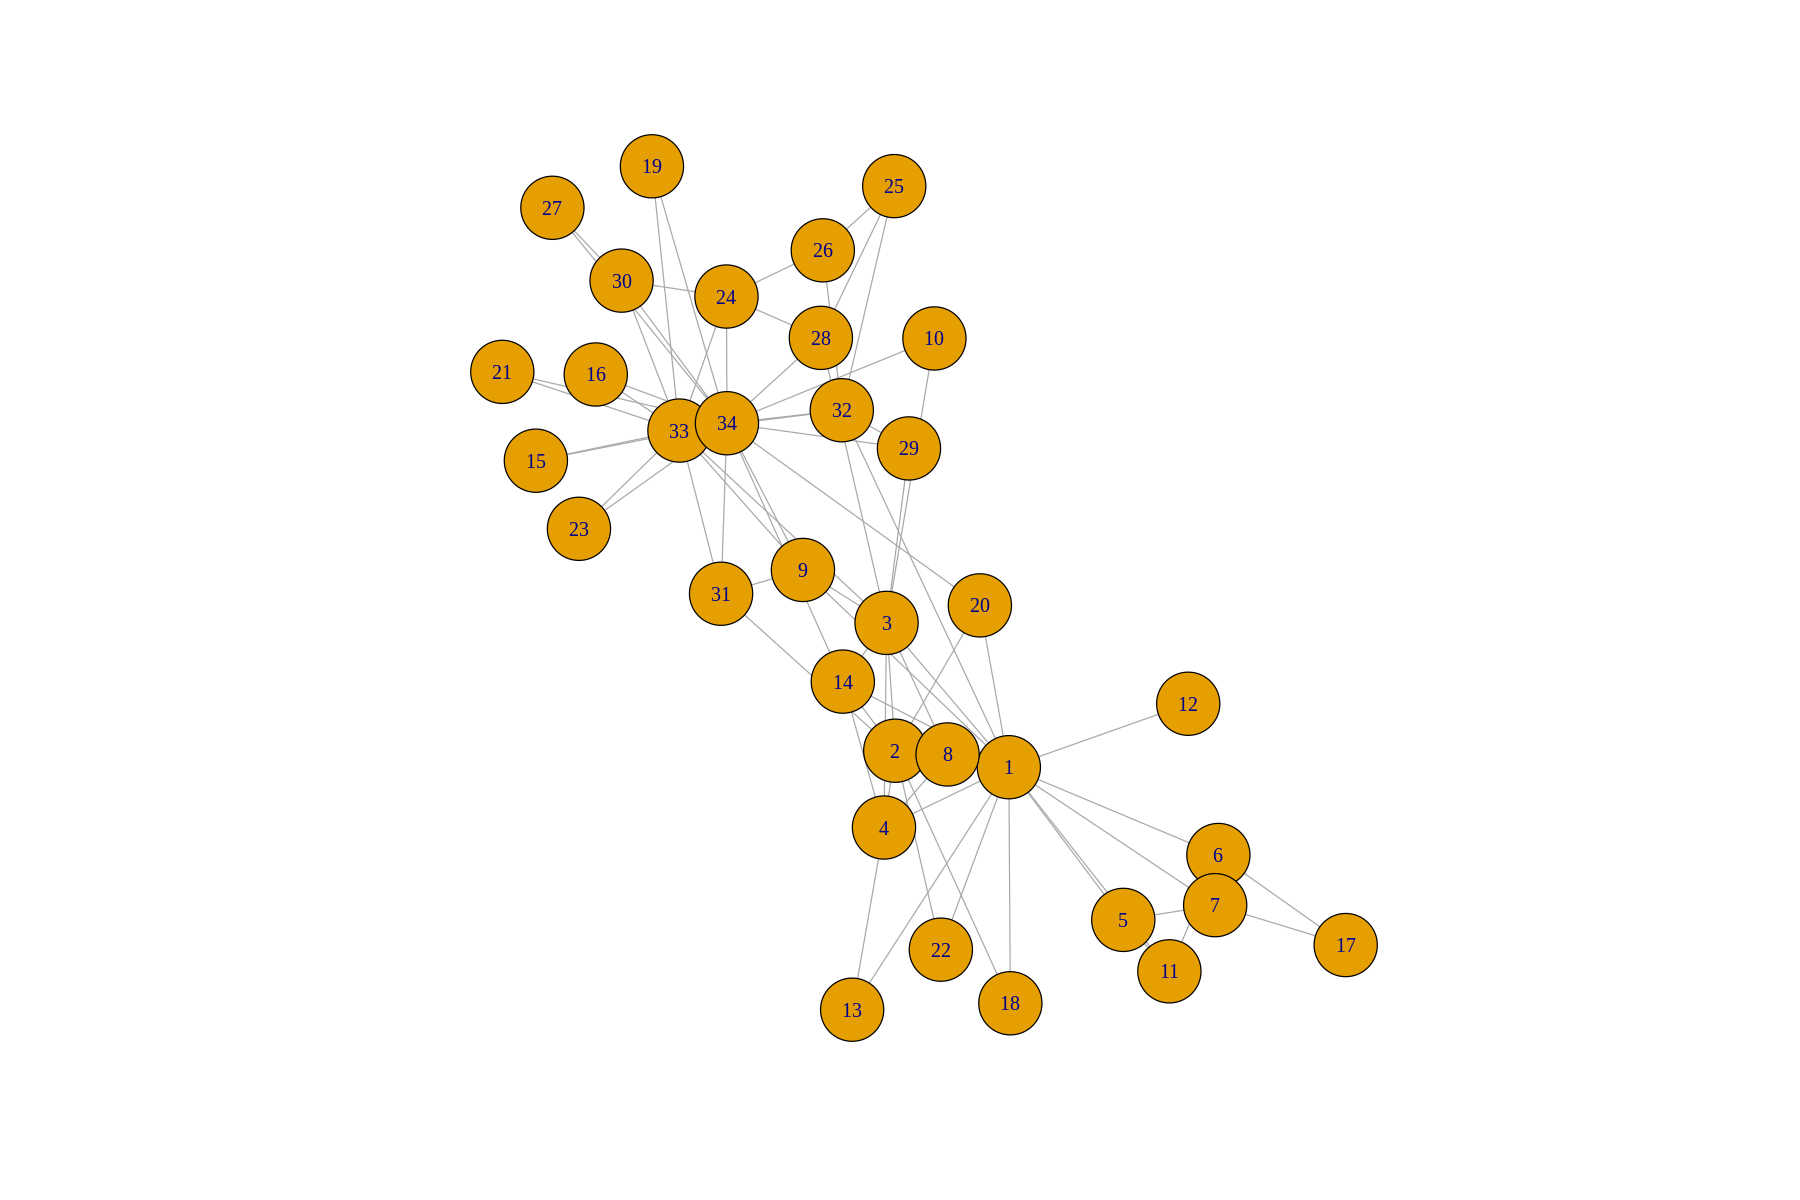

In [6]:
# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Visualização simples da rede
plot(arch_copy, layout = layout_with_fr(arch_copy))

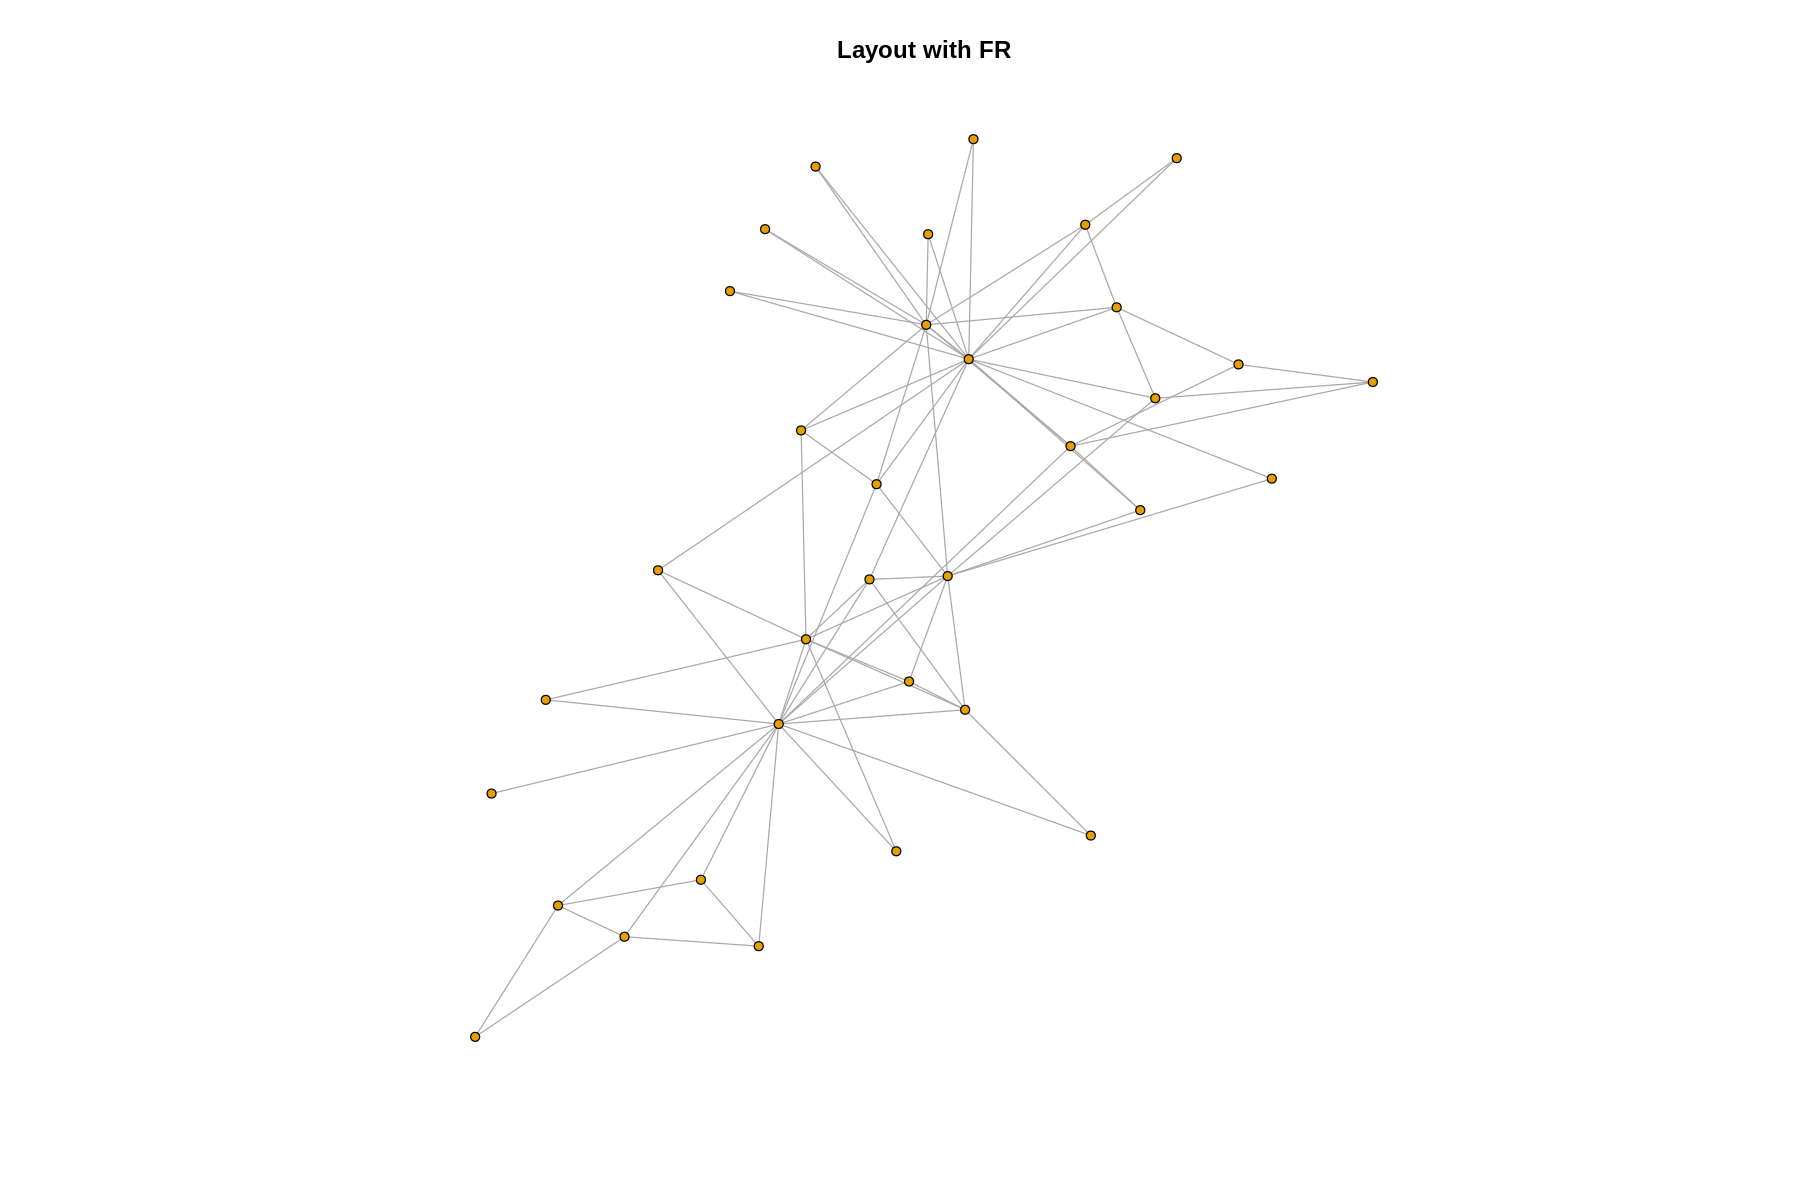

In [7]:
# Definção do tamanho dos vértices como 2
V(arch_copy)$size <- 2

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Ajuste do layout usando "layout with fr"
plot(arch_copy, layout = layout_with_fr(arch_copy), vertex.label = NA, main = "Layout with FR")

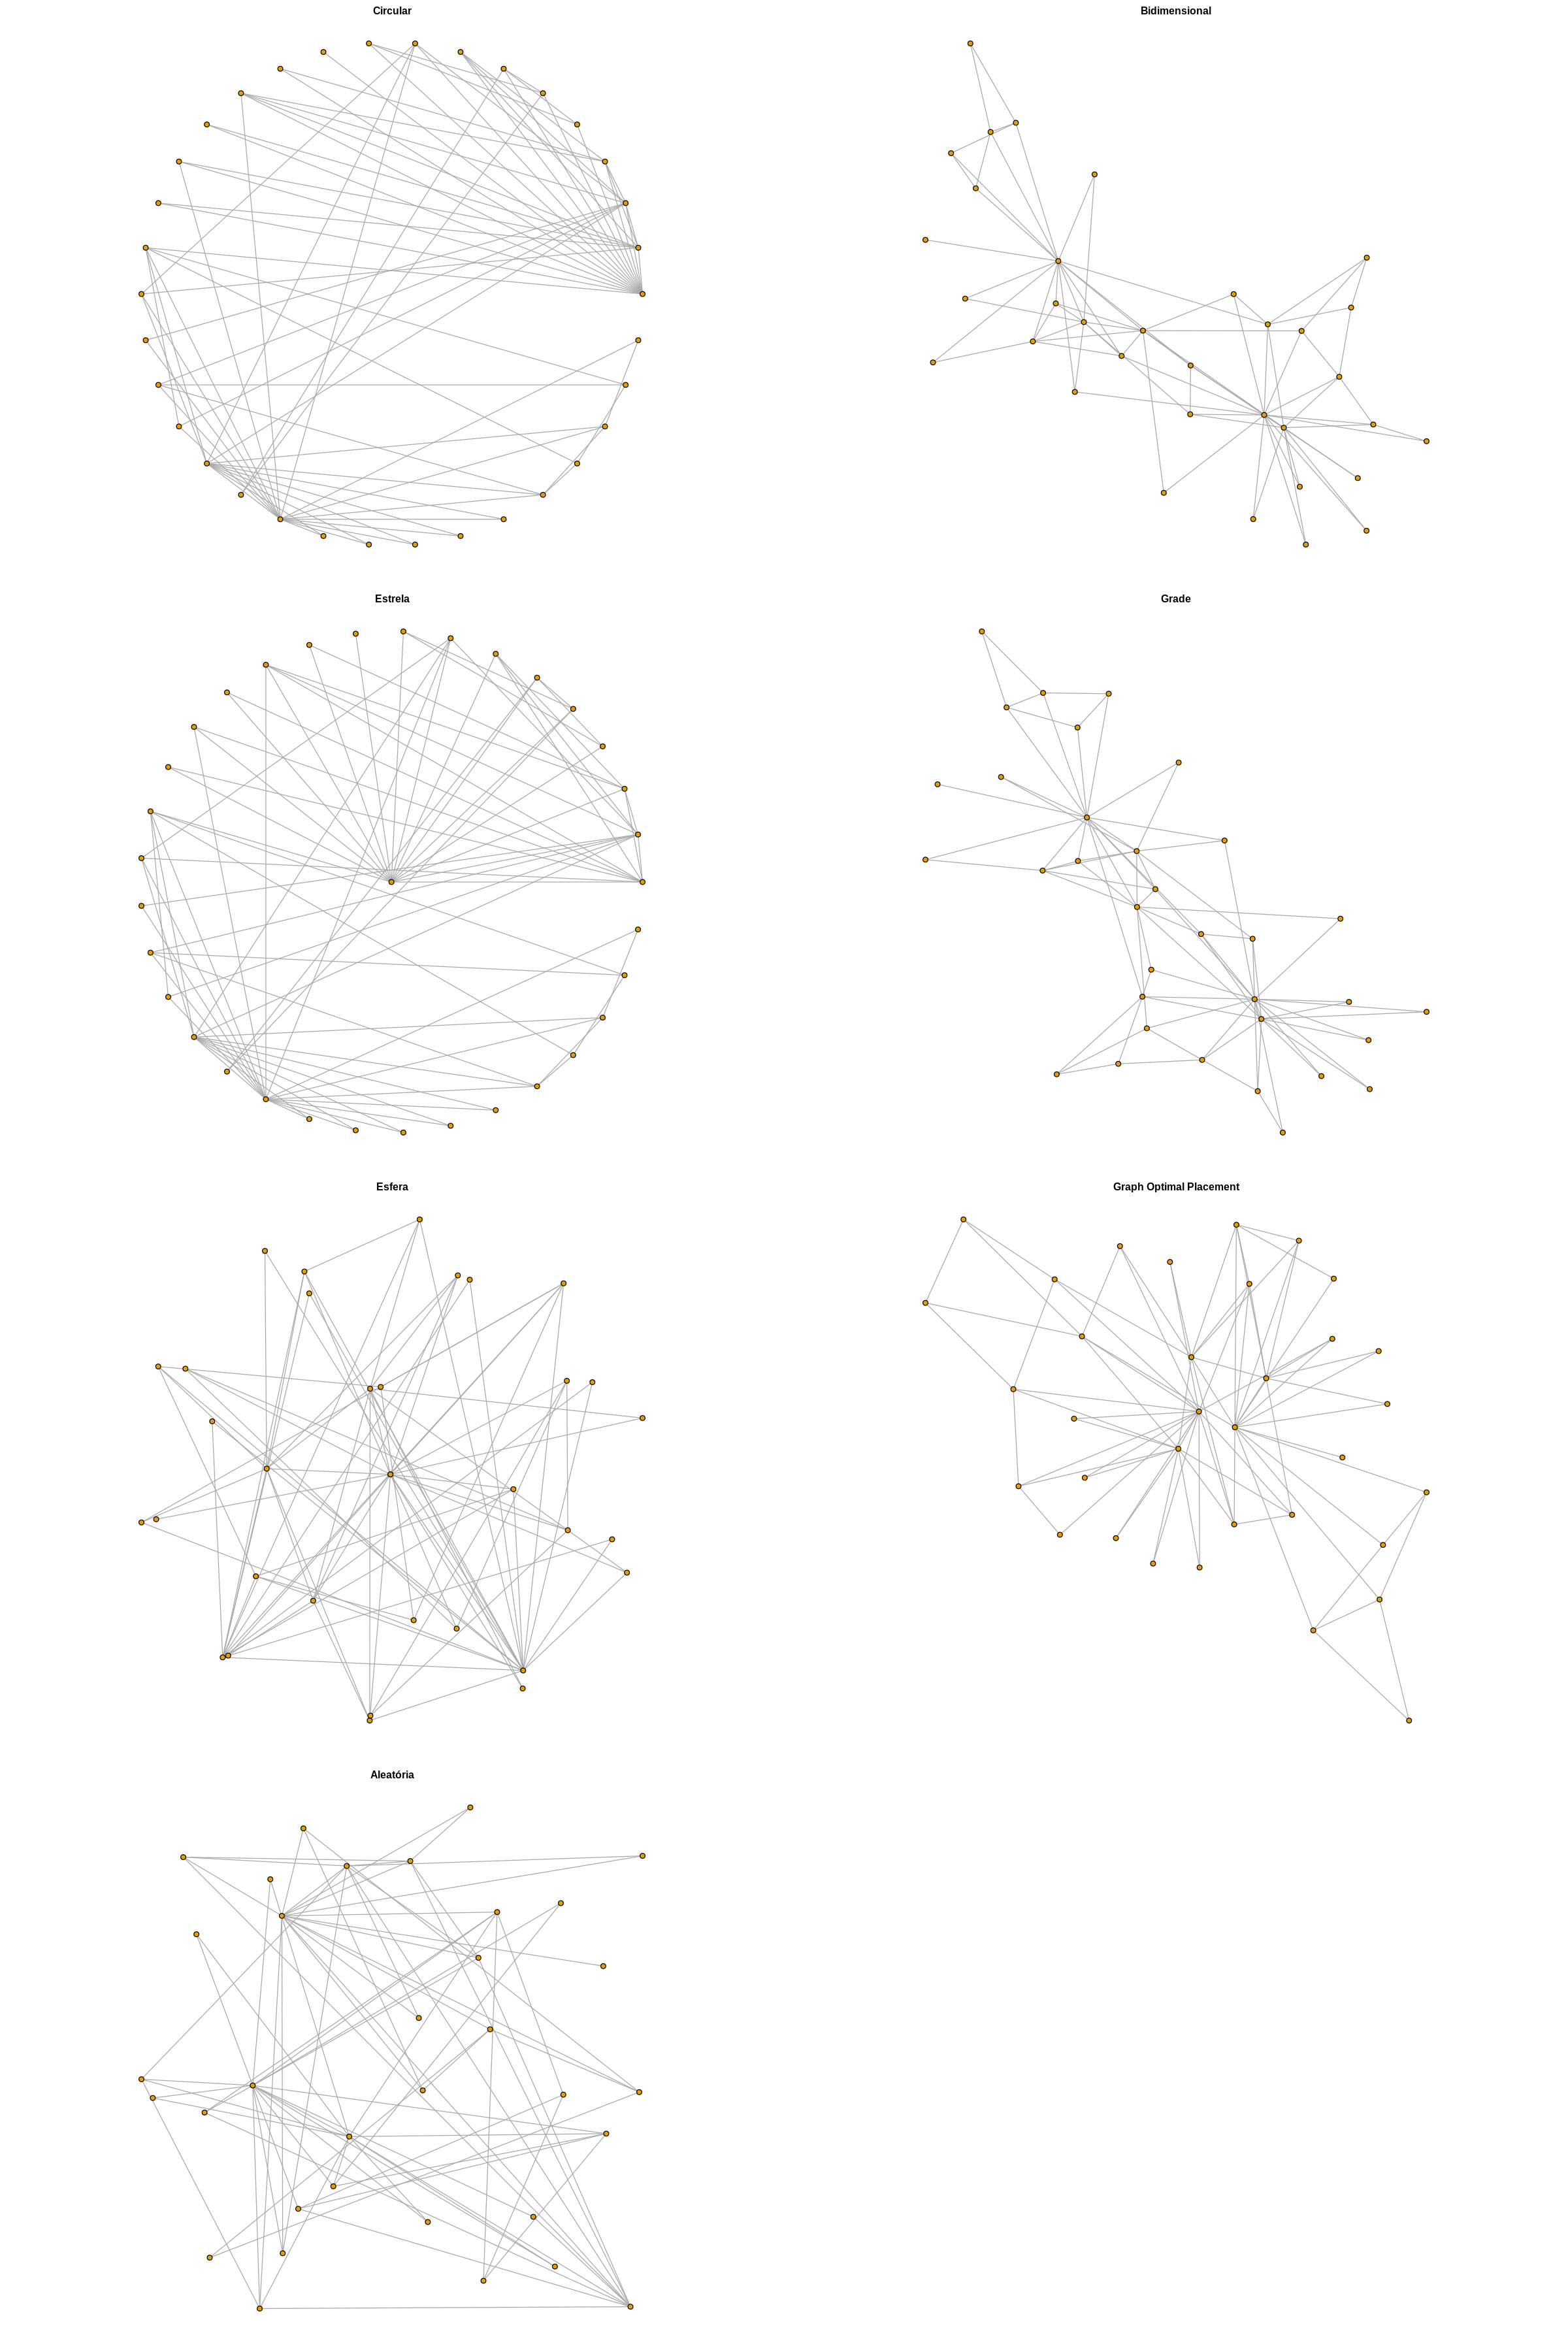

In [8]:
 # Definção do layout de plotagem como uma matriz de 3x3 e ajuste o tamanho das figuras
par(mfrow = c(4, 2), mar = c(2, 2, 2, 2))

# Tamanho das figuras
options(repr.plot.width = 20, repr.plot.height = 30)

# Representação Circular
plot(arch_copy, layout = layout_in_circle(arch_copy), vertex.label = NA, main = "Circular")

# Representação Hierárquica
#plot(arch_copy, layout = layout_with_dh(arch_copy), vertex.label = NA, main = "Hierárquica")

# Representação Bidimensional (Default)
plot(arch_copy, layout = layout_with_fr(arch_copy), vertex.label = NA, main = "Bidimensional")

# Representação em Estrela (destacando um nó central)
central_node <- V(arch_copy)[1]
plot(arch_copy, layout = layout_as_star(arch_copy, center = central_node), vertex.label = NA, main = "Estrela")

# Representação em Grade
plot(arch_copy, layout = layout_nicely(arch_copy), vertex.label = NA, main = "Grade")

# Representação em Esfera
plot.igraph(arch_copy, layout = layout_on_sphere(arch_copy), vertex.label = NA, main = "Esfera")

# Representação Graph Optimal Placement
plot(arch_copy, layout = layout_with_gem(arch_copy), vertex.label = NA, main = "Graph Optimal Placement")

# Representação Aleatória
set.seed(123)  # Semente para reproducibilidade
plot(arch_copy, layout = layout_randomly(arch_copy), vertex.label = NA, main = "Aleatória")

# Redefinição d layout de plotagem para o padrão (1x1) para futuras visualizações
par(mfrow = c(1, 1), mar = c(5.1, 4.1, 4.1, 2.1))
options(repr.plot.width = 6, repr.plot.height = 4)


### 3. Qual a distribuição de valores das seguintes métricas:
    a. Grau/grau ponderado
    b. Caminho/caminho ponderado
    c. Coeficiente de clusterização (transitividade) (com ou sem peso)


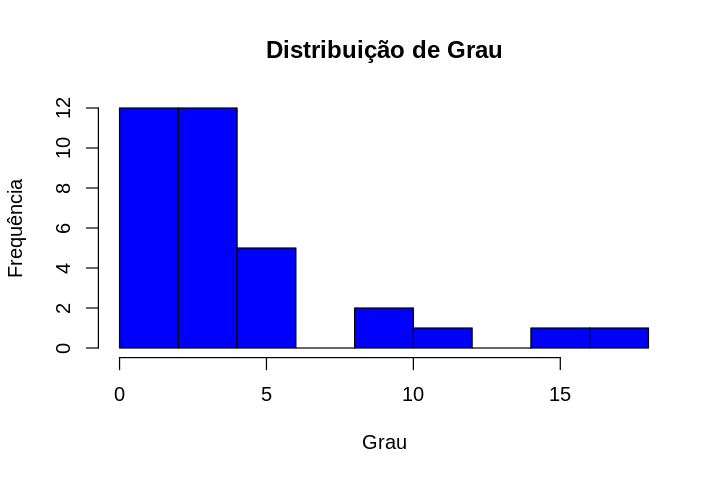

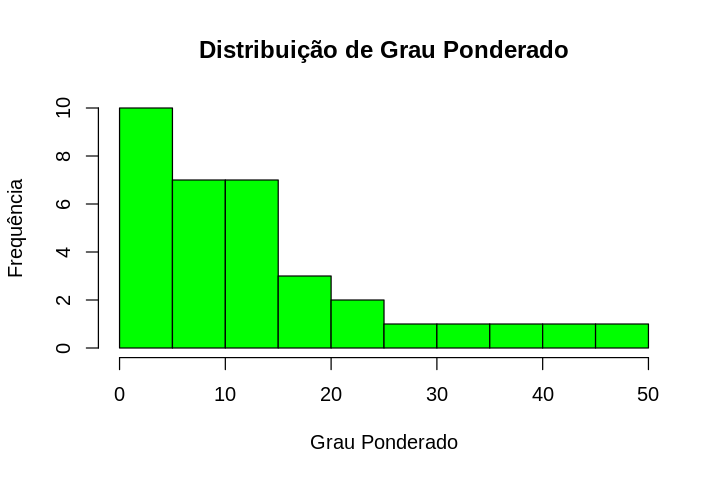

In [9]:
# Cálculo do grau para cada nó
grau <- degree(arch_copy)

# Cálculo do grau ponderado para cada nó
grau_ponderado <- strength(arch_copy)

# Visualização a distribuição de grau
hist(grau, main = "Distribuição de Grau", xlab = "Grau", ylab = "Frequência", col = "blue")

# Visualização a distribuição de grau ponderado
hist(grau_ponderado, main = "Distribuição de Grau Ponderado", xlab = "Grau Ponderado", ylab = "Frequência", col = "green")

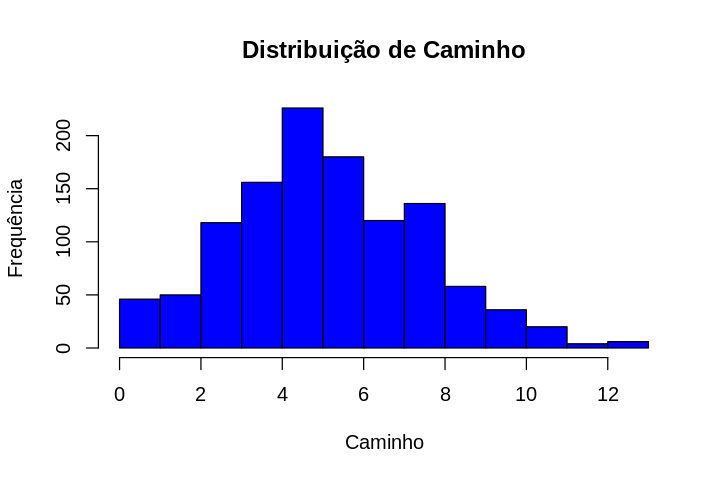

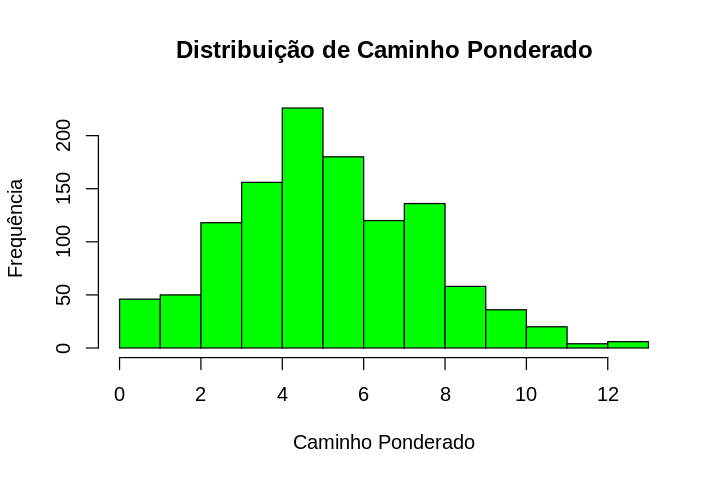

In [10]:
# Cálculo do caminho mais curto entre dois nós (caminho não ponderado)
caminho <- shortest.paths(arch_copy, mode = "all")

# Cálculo do caminho mais curto ponderado entre dois nós
caminho_ponderado <- shortest.paths(arch_copy, mode = "all", weights = E(arch_copy)$weight)

# Remoção valores infinitos e NaNs dos caminhos mínimos
caminho <- caminho[is.finite(caminho)]
caminho_ponderado <- caminho_ponderado[is.finite(caminho_ponderado)]

# Visualização a distribuição de caminho
hist(caminho, main = "Distribuição de Caminho", xlab = "Caminho", ylab = "Frequência", col = "blue")

# Visualização a distribuição de caminho ponderado
hist(caminho_ponderado, main = "Distribuição de Caminho Ponderado", xlab = "Caminho Ponderado", ylab = "Frequência", col = "green")

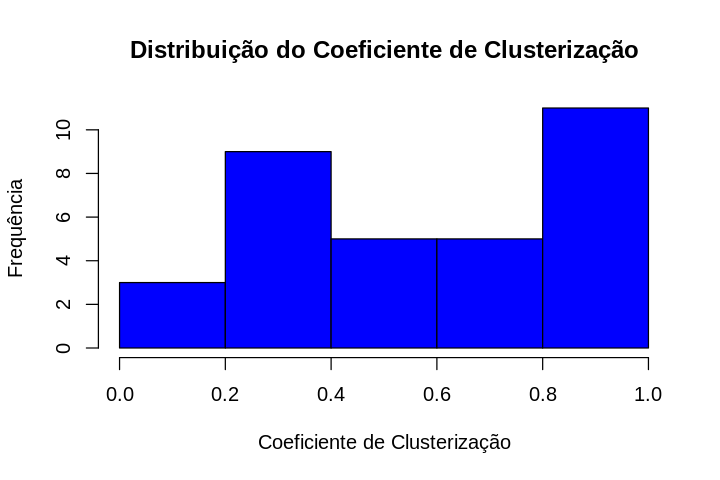

In [11]:
# Cálculo do coeficiente de clusterização para cada nó (com pesos nas arestas)
coeficiente_clusterizacao <- transitivity(arch_copy, type = "weighted")

# Remoção valores NaNs do coeficiente de clusterização
coeficiente_clusterizacao <- coeficiente_clusterizacao[!is.nan(coeficiente_clusterizacao)]

# Visualização a distribuição do coeficiente de clusterização
hist(coeficiente_clusterizacao, main = "Distribuição do Coeficiente de Clusterização", xlab = "Coeficiente de Clusterização", ylab = "Frequência", col = "blue")

### 4. Qual o tipo de agrupamento (formação de comunidades) melhor se encaixa para a rede complexa

In [12]:
set.seed(123)  # Defina uma semente para reproducibilidade

In [13]:
# Método de Walktrap

# Converção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Aplicação do algoritmo de detecção de comunidades Louvain no grafo não direcionado
comunidades_louvain <- cluster_louvain(arch_copy_undirected)

# Avaliação a qualidade das comunidades usando a métrica de modularidade
modularidade <- modularity(comunidades_louvain)

# Exibição da modularidade
cat("Modularidade das Comunidades (Louvain):", modularidade, "\n")

Modularidade das Comunidades (Louvain): 0.4438541 


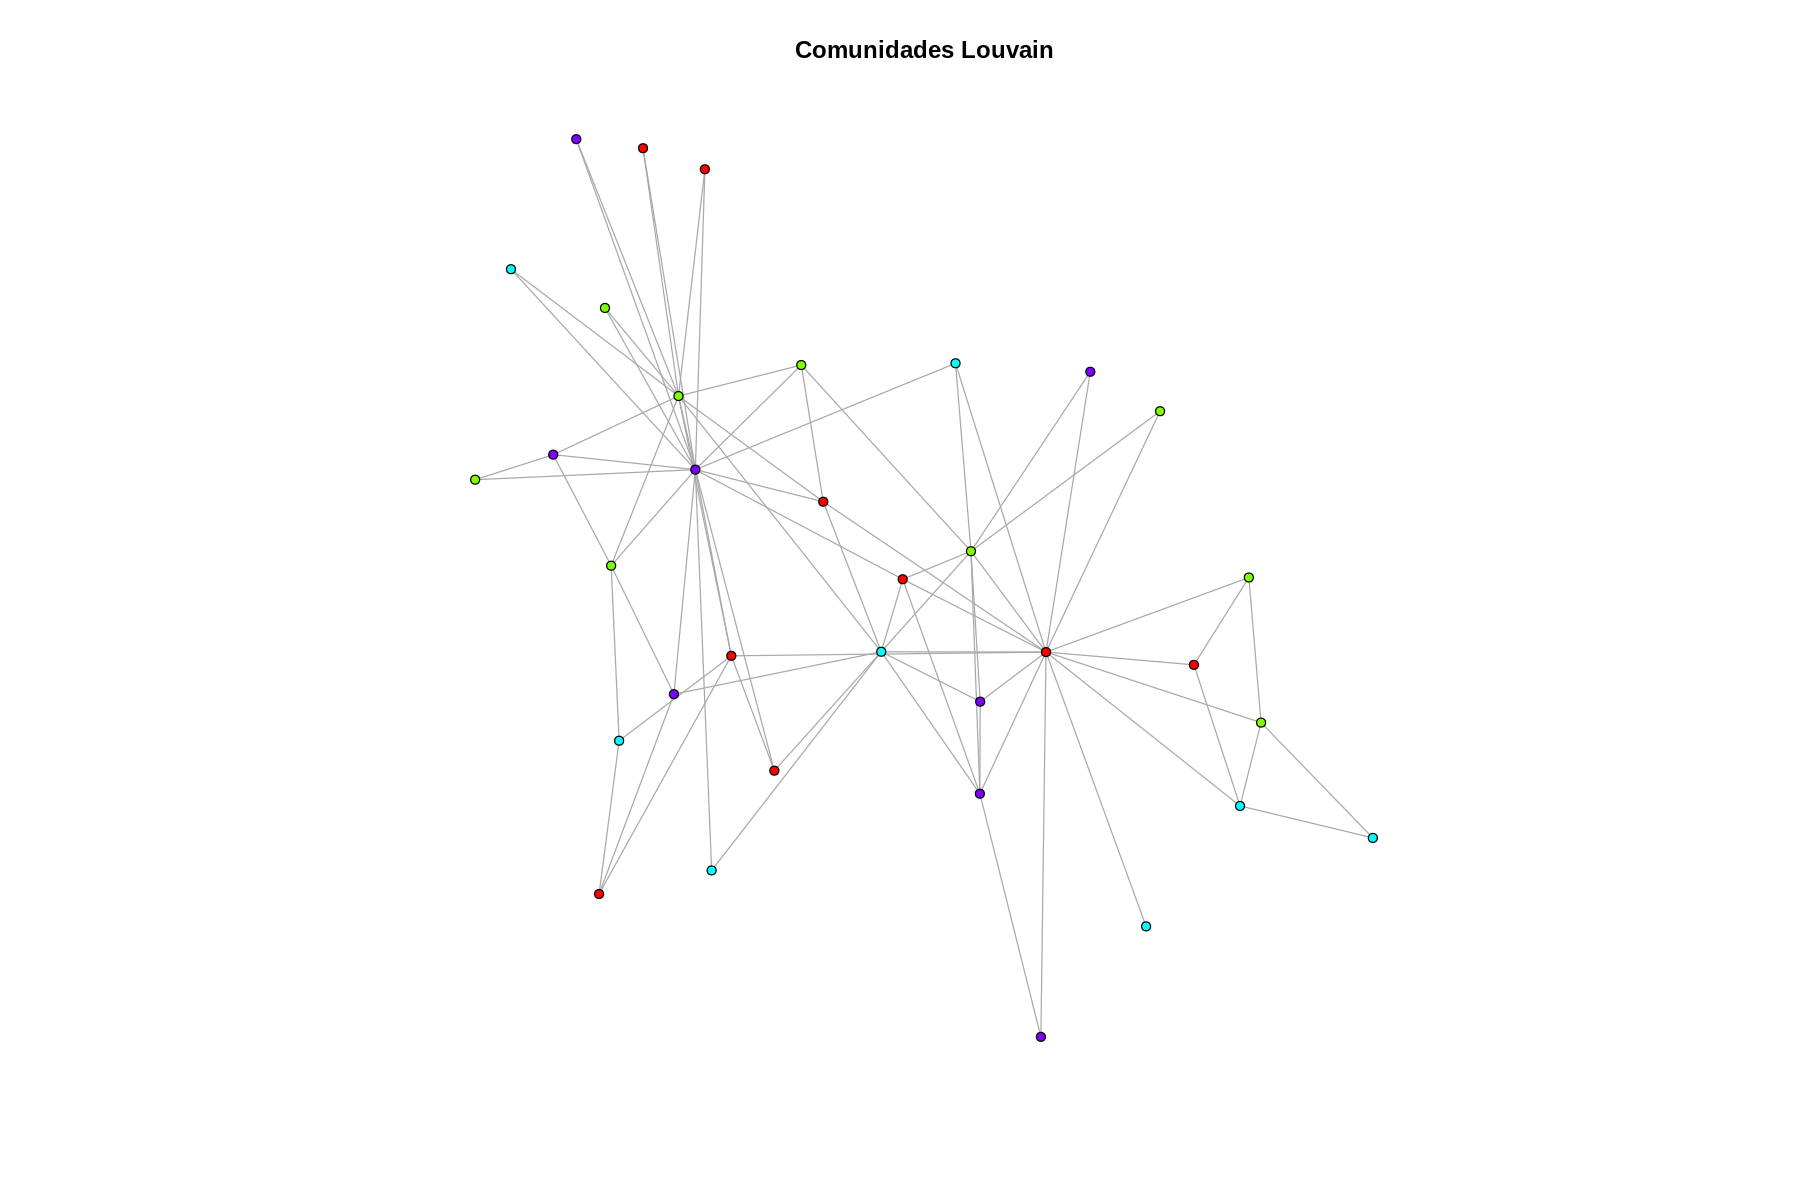

In [14]:
# Converção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Aplicação do algoritmo de detecção de comunidades Louvain no grafo não direcionado
comunidades_louvain <- cluster_louvain(arch_copy_undirected)

# Atribuição das comunidades aos vértices
V(arch_copy)$comunidade <- comunidades_louvain$membership

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plote do gráfico com cores diferentes para as comunidades
plot(arch_copy, layout = layout_with_fr(arch_copy), vertex.label = NA, main = "Comunidades Louvain", vertex.color = rainbow(length(unique(comunidades_louvain$membership))))

In [15]:
# Método de Walktrap

# Convertção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Aplicação do algoritmo de detecção de comunidades Walktrap no grafo não direcionado
comunidades_walktrap <- cluster_walktrap(arch_copy_undirected)

# Avaliação da qualidade das comunidades usando a métrica de modularidade
modularidade_walktrap <- modularity(comunidades_walktrap)

# Exibição da modularidade
cat("Modularidade das Comunidades (Walktrap):", modularidade_walktrap, "\n")

Modularidade das Comunidades (Walktrap): 0.440181 


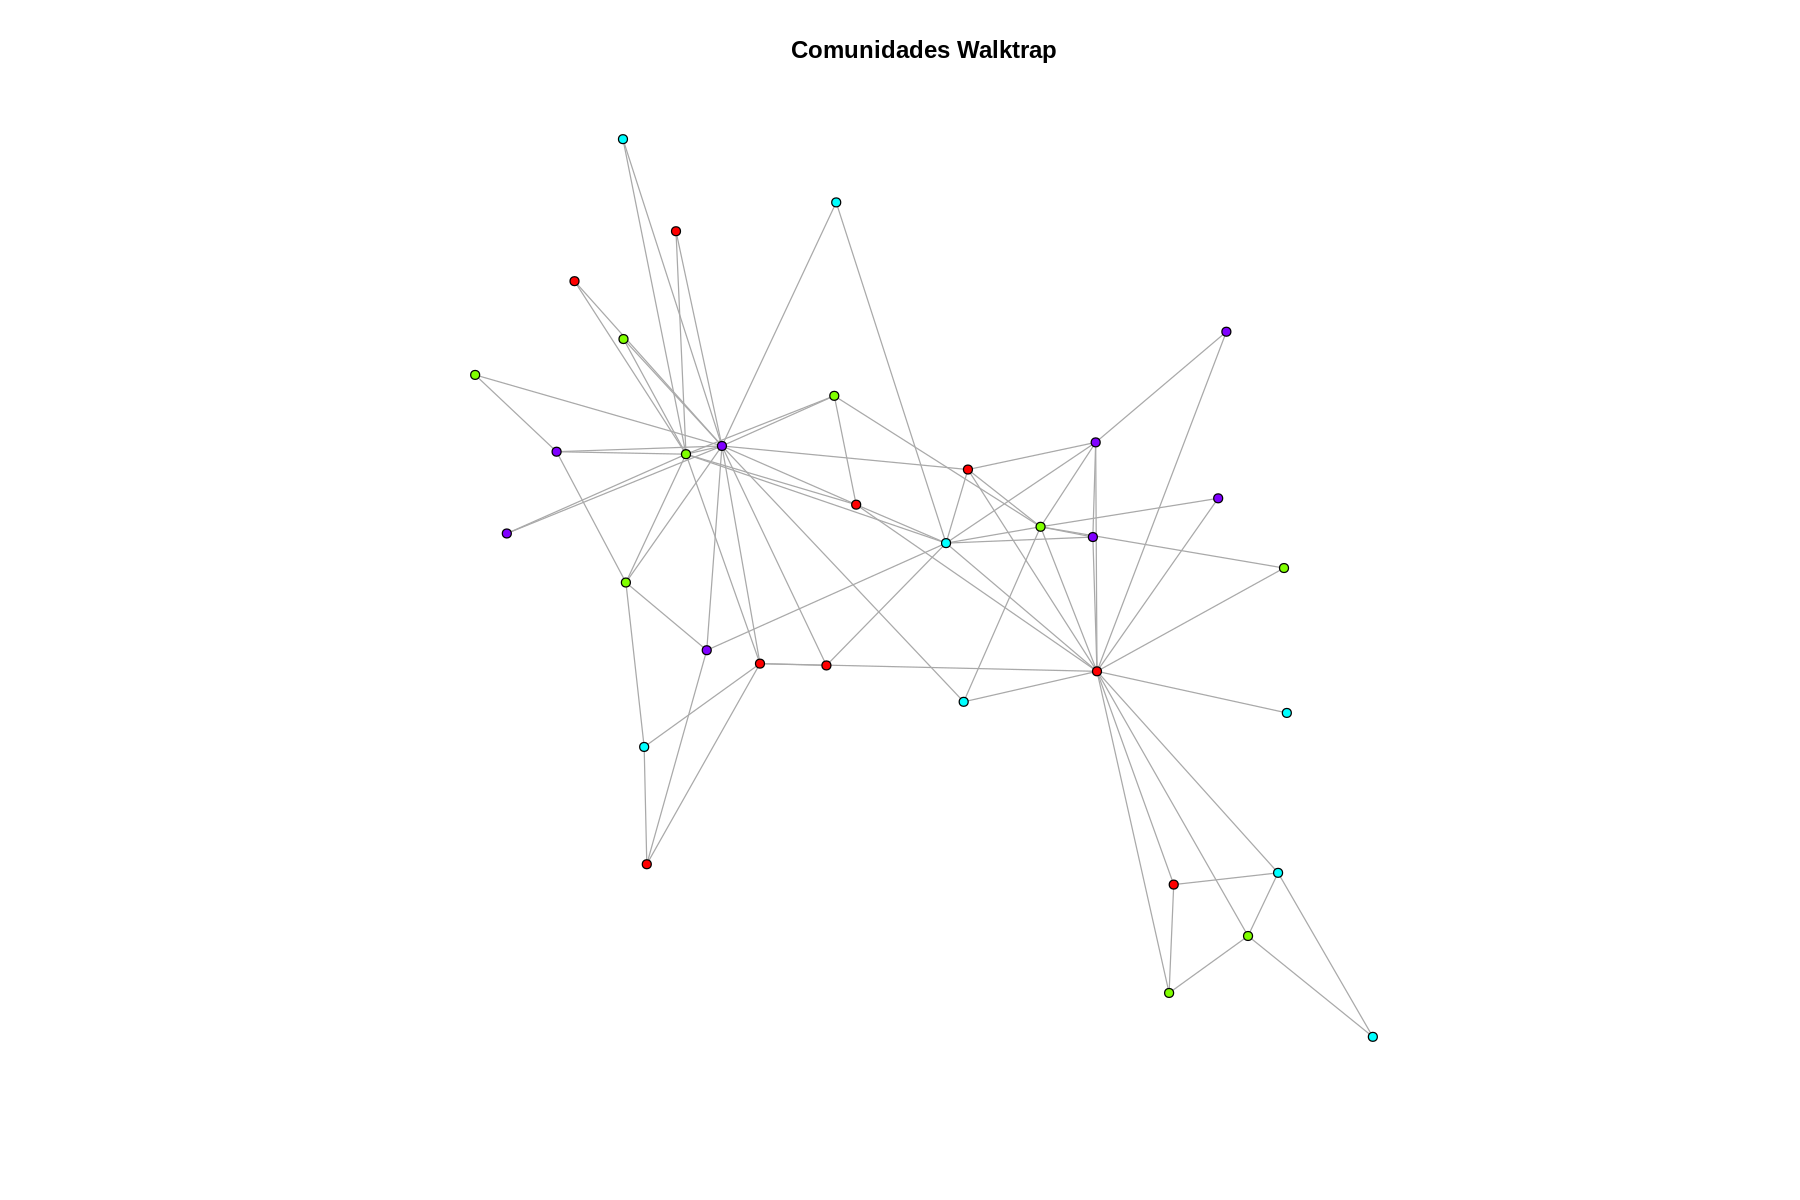

In [16]:
# Atribuição das comunidades aos vértices
V(arch_copy)$comunidade <- comunidades_walktrap$membership

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plote do gráfico com cores diferentes para as comunidades
plot(arch_copy, layout = layout_with_fr(arch_copy), vertex.label = NA, main = "Comunidades Walktrap", vertex.color = rainbow(length(unique(comunidades_walktrap$membership))))

In [17]:
# Método Edge Betweeness

# Converção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Cálculo da centralidade de betweeness das arestas
centralidade_betweeness <- edge.betweenness(arch_copy_undirected)

# Identificação das arestas com maior centralidade de betweeness para remoção
arestas_remover <- which(centralidade_betweeness == max(centralidade_betweeness))

# Remoção das arestas com maior centralidade de betweeness
arch_copy_sem_arestas <- delete_edges(arch_copy_undirected, arestas_remover)

# Aplicação do algoritmo de detecção de comunidades no grafo sem as arestas
comunidades_edge_betweeness <- cluster_fast_greedy(arch_copy_sem_arestas)

# Avaliação da qualidade das comunidades usando a métrica de modularidade
modularidade_edge_betweeness <- modularity(comunidades_edge_betweeness)

# Exibição da modularidade
cat("Modularidade das Comunidades (Edge Betweeness):", modularidade_edge_betweeness, "\n")

Modularidade das Comunidades (Edge Betweeness): 0.4384594 


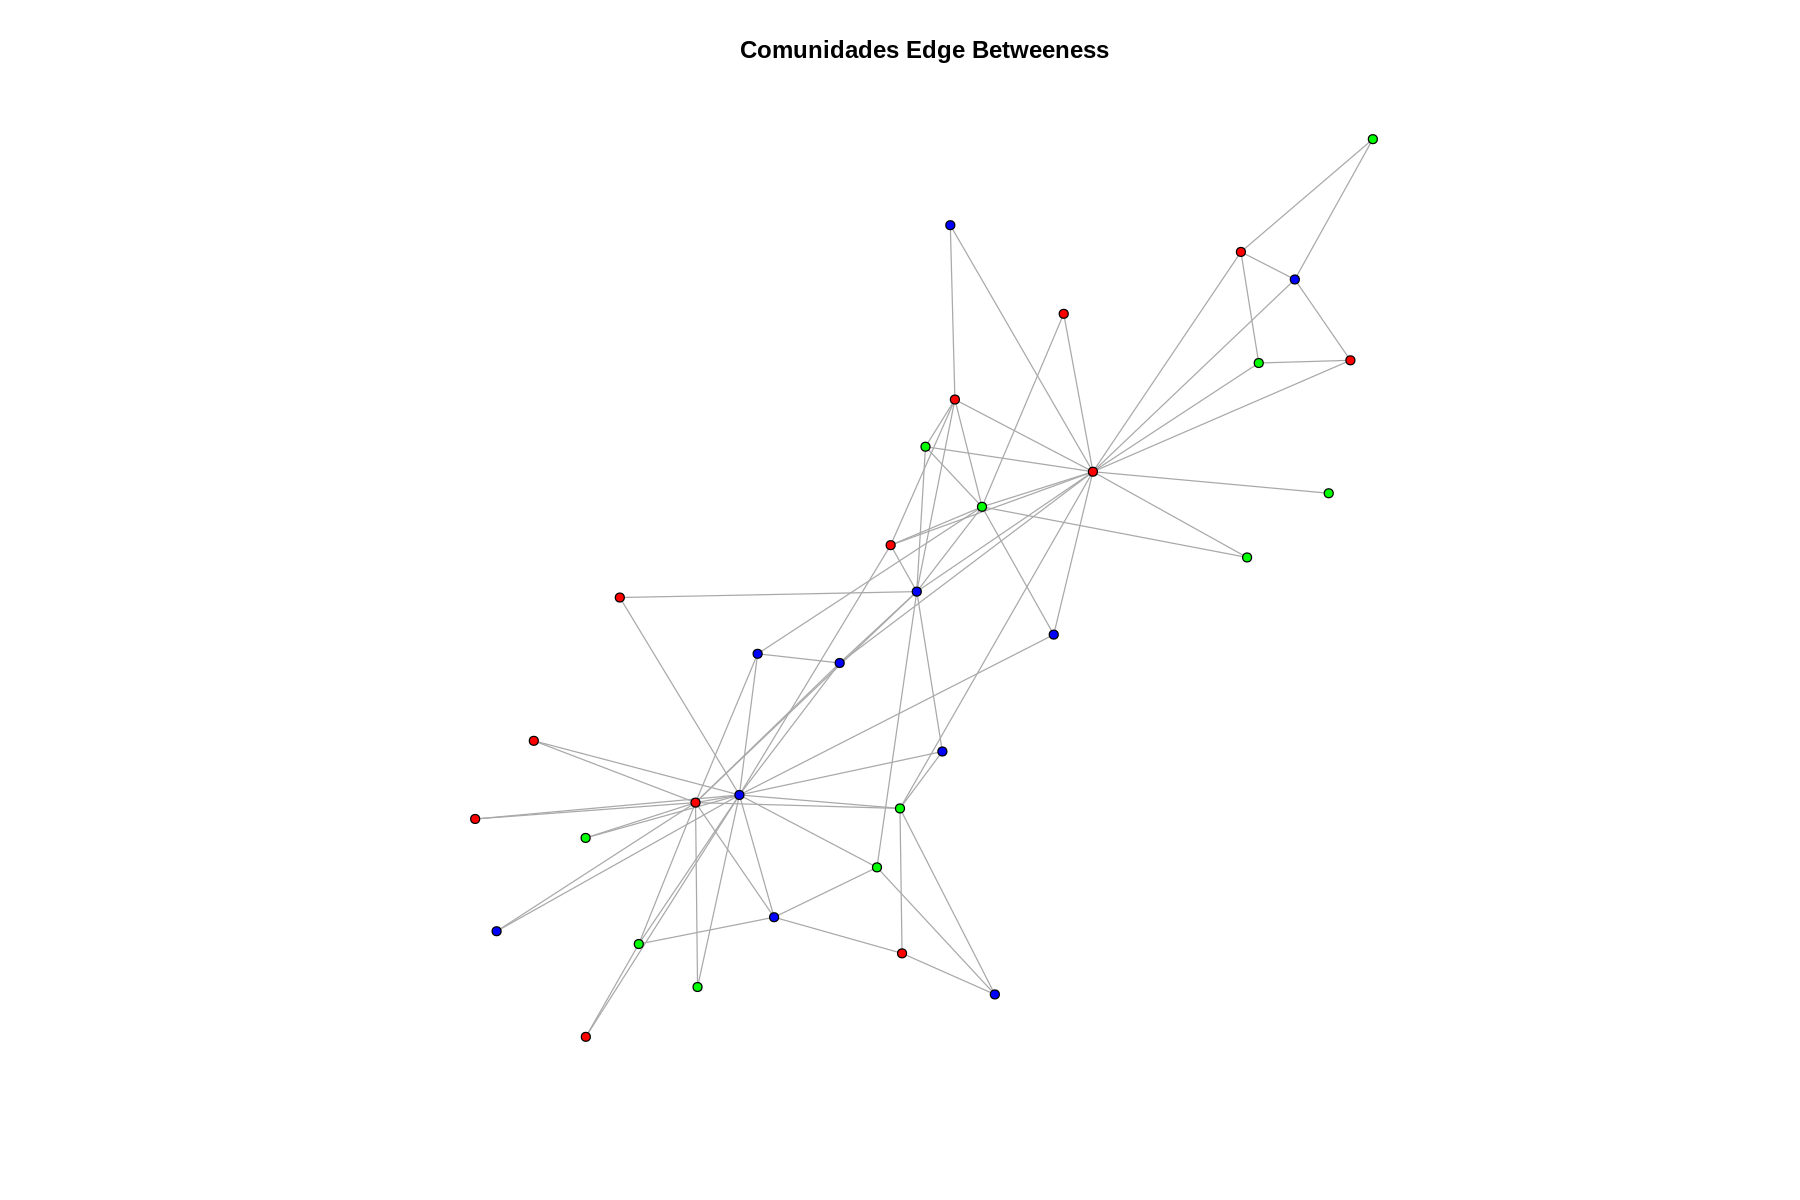

In [18]:
# Atribuição das comunidades aos vértices
V(arch_copy)$comunidade <- comunidades_edge_betweeness$membership

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plote do gráfico com cores diferentes para as comunidades
plot(arch_copy, layout = layout_with_fr(arch_copy), vertex.label = NA, main = "Comunidades Edge Betweeness", vertex.color = rainbow(length(unique(comunidades_edge_betweeness$membership))))


In [19]:
# com base nos valores de modularidade, todos os três métodos parecem ser adequados para detectar comunidades na rede complexa.
# No entanto, o método Louvain obteve a modularidade mais alta, o que indica uma divisão de comunidades ligeiramente melhor em
# comparação com os outros dois métodos. Portanto, o método Louvain pode ser considerado o melhor para essa rede específica.

### 5. Qual o nó mais importante e por quê?

In [20]:
# Centralidade de Grau (Degree Centrality)

# Cálculo da centralidade de grau para todos os nós
centrality_degree <- degree(arch_copy)

# Encontrar o nó com o maior grau
no_mais_importante <- which.max(centrality_degree)

# Exibição o nó mais importante e seu grau
print(paste("Nó mais importante (por Grau):", V(arch_copy)$name[no_mais_importante]))
print(paste("Grau:", centrality_degree[no_mais_importante]))


[1] "Nó mais importante (por Grau): 34"
[1] "Grau: 17"


In [21]:
# Centralidade de Próximidade (Closeness Centrality)

# Cálculo da centralidade de proximidade para todos os nós
centrality_closeness <- closeness(arch_copy, mode = "all")

# Encontrar o nó com a maior centralidade de proximidade
no_mais_importante <- which.max(centrality_closeness)

# Exibição do nó mais importante e sua centralidade de proximidade
print(paste("Nó mais importante (por proximidade):", V(arch_copy)$name[no_mais_importante]))
print(paste("Centralidade de Proximidade:", centrality_closeness[no_mais_importante]))


[1] "Nó mais importante (por proximidade): 1"
[1] "Centralidade de Proximidade: 0.00769230769230769"


In [22]:
#Centralidade de Intermediação (Betweenness Centrality)

# Cálculo da centralidade de intermediação para todos os nós
centrality_betweenness <- betweenness(arch_copy, directed = TRUE, normalized = TRUE)

# Encontrar o nó com a maior centralidade de intermediação
no_mais_importante_betweenness <- which.max(centrality_betweenness)

# Exibição do nó mais importante e sua centralidade de intermediação
print(paste("Nó mais importante (por intermediação):", V(arch_copy)$name[no_mais_importante_betweenness]))
print(paste("Centralidade de Intermediação:", centrality_betweenness[no_mais_importante_betweenness]))

[1] "Nó mais importante (por intermediação): 1"
[1] "Centralidade de Intermediação: 0.473768939393939"


In [23]:
#Centralidade de Vetor Próprio (Eigenvector Centrality)

# Cálculo da centralidade de vetor próprio para todos os nós
centrality_eigenvector <- eigen_centrality(arch_copy)$vector

# Encontrar o nó com a maior centralidade de vetor próprio
no_mais_importante_eigenvector <- which.max(centrality_eigenvector)

# Exibição do nó mais importante e sua centralidade de vetor próprio
print(paste("Nó mais importante (por vetor próprio):", V(arch_copy)$name[no_mais_importante_eigenvector]))
print(paste("Centralidade de Vetor Próprio:", centrality_eigenvector[no_mais_importante_eigenvector]))

[1] "Nó mais importante (por vetor próprio): 34"
[1] "Centralidade de Vetor Próprio: 1"


In [24]:
# O nó com maior centralidade de intermediação é crucial na rede elétrica dos EUA, pois atua como ponto de passagem essencial para manter a conexão e evitar falhas em cascata,
# garantindo a estabilidade do sistema. Sua posição estratégica otimiza a transmissão de energia e minimiza interrupções.

### 6. Qual a aresta mais importante e por quê?

In [25]:
# Centralidade de Intermediação (Betweenness Centrality)

# Calcular a centralidade de intermediação (Betweenness) das arestas
betweenness_values <- edge_betweenness(arch_copy)

# Encontrar o índice da aresta mais importante
indice_aresta_mais_importante <- which.max(betweenness_values)

# Obter informações da aresta mais importante
aresta_mais_importante <- E(arch_copy)[indice_aresta_mais_importante]

# Exibir informações da aresta mais importante com base na Centralidade de Intermediação
cat("Aresta mais importante (Centralidade de Intermediação):", aresta_mais_importante, "\n")

Aresta mais importante (Centralidade de Intermediação): 53 


### 7. Qual o diâmetro da rede?

In [26]:
# Calcular o diâmetro da rede
diametro <- diameter(arch_copy, directed = FALSE)

# Exibir o diâmetro
cat("Diâmetro da rede:", diametro, "\n")

Diâmetro da rede: 13 


### 8. Como você classificaria a rede?
    a. Aleatória, mundo pequeno, escala-livre

In [27]:
# Com base no diâmetro da rede e na importância da centralidade de intermediação, a classificação para a rede seria "escala-livre".
# Isso pois possui uma estrutura que não é puramente aleatória nem estritamente em forma de mundo pequeno, mas exibe características
# de uma rede com hnós altamente conectados que desempenham um papel fundamental na manutenção da integridade do sistema.

### 9. Há alguma informação subjacente (indireta em relação às métricas) que você vislumbrou na rede?

In [28]:
# A rede elétrica dos EUA exibe características de uma rede complexa, com alta centralidade de intermediação,
# modularidade significativa e diâmetro extensivo. O nó mais importante por intermediação desempenha um papel
# crucial na conectividade da rede. Sua estrutura é classificada como "escala-livre," indicando a presença de
# nós estratégicos. Essas informações são essenciais para o planejamento e a resiliência do sistema elétrico.